In [3]:
from sqlalchemy import (create_engine, Table, Column, Integer, String, MetaData, inspect)
import pandas as pd
import pymysql.cursors
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


The average rating for restaurants in Pittsburgh is  3.51101005266
The average rating for restaurants in Toronto is  3.4340936019
The average rating for restaurants in Las Vegas is  3.45558487247
The average rating for restaurants in Edinburgh is  3.83333333333


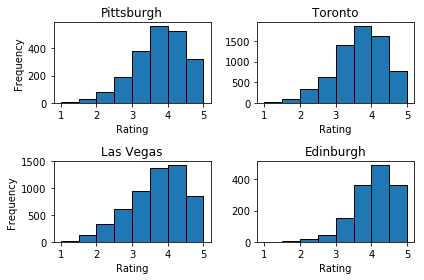

In [4]:

connection = pymysql.connect(host='localhost',
                             user='root',
                             password='Tianyu931211',#put your password for mysql server here.
                             db='yelp_db',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
Pittsburgh_rate=[]
# number of restaurants per city, read into a dataframe
pittsburgh_rate=pd.read_sql('''SELECT stars as "reviews stars in Pisttburgh" FROM category inner join business on business.id = category.business_id WHERE business.city = "pittsburgh" and category.category= "restaurants";''',connection).values
edinburgh_rate=pd.read_sql('''SELECT stars as "reviews stars in Pisttburgh" FROM category inner join business on business.id = category.business_id WHERE business.city = "Edinburgh" and category.category= "restaurants";''',connection).values
toronto_rate=pd.read_sql('''SELECT stars as "reviews stars in Pisttburgh" FROM category inner join business on business.id = category.business_id WHERE business.city = "toronto" and category.category= "restaurants";''',connection).values
vegas_rate=pd.read_sql('''SELECT stars as "reviews stars in Las Vegas" FROM category inner join business on business.id = category.business_id WHERE business.city = "las vegas" and category.category= "restaurants";''',connection).values
plt.title("Distribution of Rating from Different Cities")
plt.subplot(221)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Pittsburgh')
result1=plt.hist(pittsburgh_rate, bins=np.arange(1, 5 + 0.5, 0.5),edgecolor='black')
print("The average rating for restaurants in Pittsburgh is ", np.mean(pittsburgh_rate))

plt.subplot(222)
plt.xlabel('Rating') 
plt.title('Toronto')
result2=plt.hist(toronto_rate, bins=np.arange(1, 5 + 0.5, 0.5),edgecolor='black')
print("The average rating for restaurants in Toronto is ", np.mean(toronto_rate))


plt.subplot(223)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Las Vegas')
result3=plt.hist(vegas_rate, bins=np.arange(1, 5 + 0.5, 0.5),edgecolor='black')
print("The average rating for restaurants in Las Vegas is ", np.mean(vegas_rate))

plt.subplot(224)
plt.xlabel('Rating')
plt.title('Edinburgh')
result4=plt.hist(edinburgh_rate, bins=np.arange(1, 5 + 0.5, 0.5),edgecolor='black')
print("The average rating for restaurants in Edinburgh is ", np.mean(edinburgh_rate))

plt.tight_layout()

The average rating for restaurants in Pittsburgh is  3.51101005266


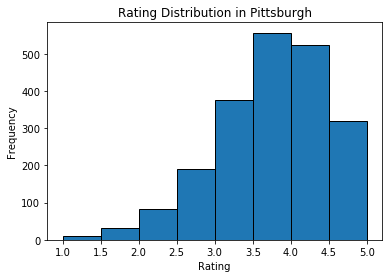

In [5]:

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution in Pittsburgh')
result1=plt.hist(pittsburgh_rate, bins=np.arange(1, 5 + 0.5, 0.5),edgecolor='black')
print("The average rating for restaurants in Pittsburgh is ", np.mean(pittsburgh_rate))

In [8]:
#rating distribution for Chinese Restaurants in Pittsburgh
def cuisine_rate_distribution(cuisine):
    pittsburgh_cuisine_rate=pd.read_sql('''SELECT business.stars  FROM category inner join business on business.id = category.business_id WHERE business.city = "pittsburgh" and category.category= "'''+cuisine+'''"''',connection).values
    Pittsburgh_cuisine_rate=[]
    for i in pittsburgh_cuisine_rate:
        Pittsburgh_cuisine_rate.append(i[0])
    PC={}
    for i in Pittsburgh_cuisine_rate:
        PC[i]=Pittsburgh_cuisine_rate.count(i)
    lists=sorted(PC.items())
    stars,frequency=zip(*lists)
    frequency=list(frequency)
    for i in range(0,len(frequency)):
        frequency[i]=frequency[i]/len(Pittsburgh_cuisine_rate)
    stars=np.arange(len(stars))
    plt.title(cuisine)
    plt.xlabel('Rating')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.xticks(stars, ( '1.5', '2', '2.5','3','3.5','4','4.5','5'))
    plt.bar(stars,frequency,color='c')
    

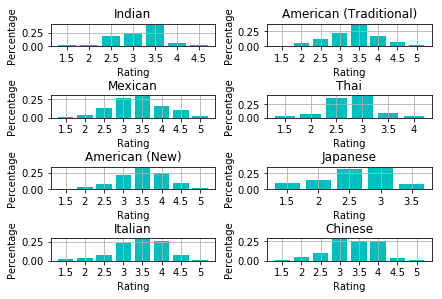

In [9]:
plt.subplot(421)
cuisine_rate_distribution("Indian")
plt.subplot(422)
cuisine_rate_distribution("American (Traditional)")
plt.subplot(423)
cuisine_rate_distribution("Mexican")
plt.subplot(424)
cuisine_rate_distribution("Thai")
plt.subplot(425)
cuisine_rate_distribution("American (New)")
plt.subplot(426)
cuisine_rate_distribution("Japanese")
plt.subplot(427)
cuisine_rate_distribution("Italian")
plt.subplot(428)
cuisine_rate_distribution("Chinese")
plt.tight_layout(pad=0.2, w_pad=0.5)

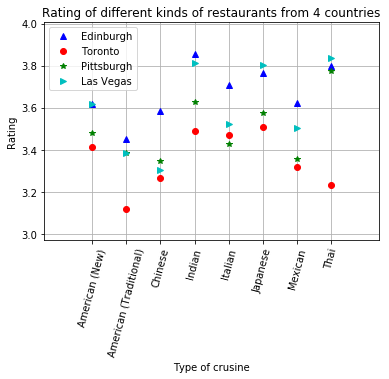

In [10]:
country_crusine_score_table=pd.read_sql(
        '''SELECT business.city,category.category, avg(business.stars) as "Average Score"
        FROM category inner join business on business.id = category.business_id WHERE business.city in("pittsburgh","toronto","las vegas","Edinburgh")
        and category.category in ("Chinese","American (Traditional)","Mexican","Indian","American (New)","Japanese","Italian","Thai")
        group by business.city, category.category order by business.city,category.category;''',connection).values

labels=[]
for i in country_crusine_score_table:
    labels.append(i[1])

labels=sorted(list(set(labels)))

Edinburgh=[]
for i in country_crusine_score_table:
    if(i[0]=="Edinburgh"):
        Edinburgh.append(i[2])

Pittsburgh=[]
for i in country_crusine_score_table:
    if(i[0]=="Pittsburgh"):
        Pittsburgh.append(i[2])

Las_Vegas=[]
for i in country_crusine_score_table:
    if(i[0]=="Las Vegas"):
        Las_Vegas.append(i[2])

Toronto=[]
for i in country_crusine_score_table:
    if(i[0]=="Toronto"):
        Toronto.append(i[2])
        
x=list(np.arange(len(labels)+1))
x.pop(0)

plt.plot(x,Edinburgh,"b^",label="Edinburgh") 
plt.plot(x,Toronto,"ro",label="Toronto")
plt.plot(x,Pittsburgh,"g*",label="Pittsburgh")
plt.plot(x,Las_Vegas,"c>", label='Las Vegas')

plt.title('Rating of different kinds of restaurants from 4 countries')
plt.xlabel('Type of crusine')
plt.ylabel('Rating')
plt.legend()
plt.xticks(x, labels, rotation='75')
plt.margins(0.2)
plt.grid(True)
#plt.subplots_adjust(bottom=0.15)
plt.show()

C:\Users\yutia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


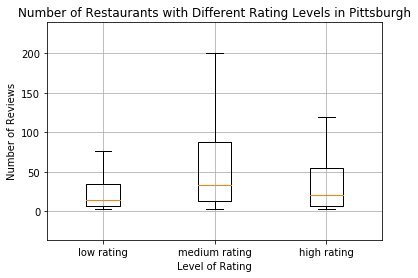

In [11]:
pittsburgh_rating=pd.read_sql('''select business.stars, business.review_count
FROM category inner join business on business.id = category.business_id
where business.city="pittsburgh" and category.category="restaurants"
order by business.stars;''',connection).values
                             
Pittsburgh_rating={}
Pittsburgh_rating["low rating"]=[]
Pittsburgh_rating["medium rating"]=[]
Pittsburgh_rating["high rating"]=[]
for p_r in pittsburgh_rating:
    rating,count = p_r
    
    if( rating<=3):
        rating="low rating"
        Pittsburgh_rating[rating].append(count) 
    elif( 3<rating<=4):
        rating="medium rating"
        Pittsburgh_rating[rating].append(count)   
    else:
        rating="high rating"
        Pittsburgh_rating[rating].append(count)                          


data=[Pittsburgh_rating["low rating"],Pittsburgh_rating["medium rating"],Pittsburgh_rating["high rating"]]

#plt.figure()
plt.boxplot(data,0,'')
plt.legend()
labels=["low rating", "medium rating", "high rating"]
plt.title('Number of Restaurants with Different Rating Levels in Pittsburgh')
plt.xlabel('Level of Rating')
plt.ylabel('Number of Reviews')
plt.xticks([1,2,3], labels, rotation="0")
plt.margins(0.2)
plt.grid(True)



C:\Users\yutia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


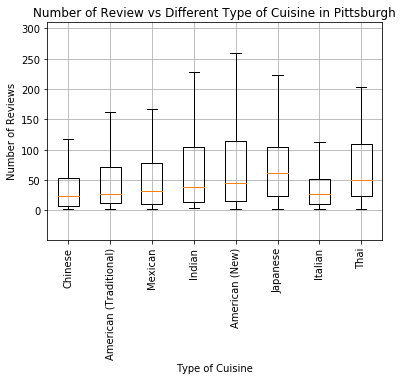

In [106]:

pittsburgh_cuisine=pd.read_sql('''select category.category, business.review_count
FROM category inner join business on business.id = category.business_id
where business.city="pittsburgh" and category.category in ("Chinese","American (Traditional)","Mexican","Indian","American (New)","Japanese","Italian","Thai")
order by category.category;''',connection).values
Cuisine=["Chinese","American (Traditional)","Mexican","Indian","American (New)","Japanese","Italian","Thai"]                          
Pittsburgh_cuisine={}
for i in Cuisine:
    Pittsburgh_cuisine[i]=[]

for c_c in pittsburgh_cuisine:
    cuisine,count = c_c
    Pittsburgh_cuisine[cuisine].append(count) 
                    


data=[]
for i in Cuisine:
    data.append(Pittsburgh_cuisine[i])
x=list(np.arange(len(Cuisine)+1))
x.pop(0)
plt.figure()
plt.boxplot(data,0,"")

plt.legend()
labels=Cuisine
plt.title('Number of Review vs Different Type of Cuisine in Pittsburgh')
plt.xlabel('Type of Cuisine')
plt.ylabel('Number of Reviews')
plt.xticks(x, labels, rotation="90")
plt.margins(0.2)
plt.grid(True)

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer


def return_length(review):
    
    stopWords = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')
    wordsFiltered = []
    words=tokenizer.tokenize(review)
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)

    for i in range(0,len(wordsFiltered)):
        wordsFiltered[i]=lemmatizer.lemmatize(wordsFiltered[i])
    return len(wordsFiltered)

In [17]:
#def city_query (City):
 #   data=pd.read_sql('''select business.city,review.text FROM category inner join business on business.id = category.business_id inner join review on business.id=review.business_id where business.city = "'''+City+'''" and category.category ="restaurants" limit 5000;''',connection).values
  #  City_review={}
   # City_review[City]=[]
    #for d in data:
     #   city,review = d
      #  City_review[city].append(review) 
   # Length=[];
    #for i in City_review[City]:
     #   Length.append(return_length(i))
#    plt.boxplot(Length,0,"")    
 #   plt.show()

In [100]:
#city_query("Toronto")


In [17]:
def cuisine_query (Cuisine):
    data=pd.read_sql('''select business.city,review.text FROM category inner join business on business.id = category.business_id inner join review on business.id=review.business_id where business.city ="Pittsburgh" and category.category ="'''+Cuisine+'''" limit 5000;''',connection).values
    cuisine_review={}
    cuisine_review[Cuisine]=[]
    for d in data:
        city,review = d
        cuisine_review[Cuisine].append(review) 
    Length=[];
    for i in cuisine_review[Cuisine]:
        Length.append(return_length(i))
    return (Cuisine,Length)

In [18]:
def plot_query(cuisine_list):
    data=[]
    labels=[]
    for i in cuisine_list:
        result_tuple=cuisine_query(i)
        labels.append(result_tuple[0])
        data.append(result_tuple[1])
    
    x=list(np.arange(len(labels)+1))
    x.pop(0)
    plt.figure()
    plt.boxplot(data,0,"")

    plt.legend()
    plt.title('Number of Words for each Review vs Different Type of Cuisine in Pittsburgh')
    plt.xlabel('Type of Cuisine')
    plt.ylabel('Number of Words for each review')
    plt.xticks(x, labels, rotation="90")
    plt.margins(0.2)
    plt.grid(True)
        

C:\Users\yutia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


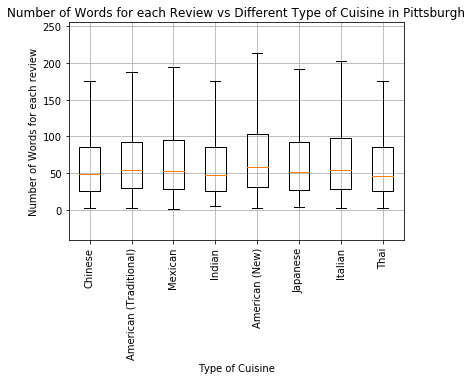

In [19]:
plot_query(["Chinese","American (Traditional)","Mexican","Indian","American (New)","Japanese","Italian","Thai"])